In [ ]:
!unzip orlarchive # unzipping the archive for ORL dataset

Archive:  orlarchive.zip
  inflating: README                  
  inflating: s1/1.pgm                
  inflating: s1/10.pgm               
  inflating: s1/2.pgm                
  inflating: s1/3.pgm                
  inflating: s1/4.pgm                
  inflating: s1/5.pgm                
  inflating: s1/6.pgm                
  inflating: s1/7.pgm                
  inflating: s1/8.pgm                
  inflating: s1/9.pgm                
  inflating: s10/1.pgm               
  inflating: s10/10.pgm              
  inflating: s10/2.pgm               
  inflating: s10/3.pgm               
  inflating: s10/4.pgm               
  inflating: s10/5.pgm               
  inflating: s10/6.pgm               
  inflating: s10/7.pgm               
  inflating: s10/8.pgm               
  inflating: s10/9.pgm               
  inflating: s11/1.pgm               
  inflating: s11/10.pgm              
  inflating: s11/2.pgm               
  inflating: s11/3.pgm               
  inflating: s11/4.pgm   

In [ ]:
!ls  #checking that the data is extracted in directory

orlarchive.zip	s11  s15  s19  s22  s26  s3   s33  s37	s40  s8
README		s12  s16  s2   s23  s27  s30  s34  s38	s5   s9
s1		s13  s17  s20  s24  s28  s31  s35  s39	s6   sample_data
s10		s14  s18  s21  s25  s29  s32  s36  s4	s7


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import os
from skimage import io

In [ ]:
#initialising empty arrays to store data and labels
data = []
labels = []

In [ ]:
# Number of subjects and images per subject
num_subjects = 40
images_per_subject = 10

In [ ]:
extracted_dir = '/content/'

In [ ]:
data_matrix = []
label_vector = []

In [ ]:
#iterating through each subject
for subject_id in range(1,num_subjects+1):
    subject_folder = os.path.join(extracted_dir, f's{subject_id}')

    #iterating through each image in the subject folder
    for img_index in range(1,images_per_subject+1):
        img_path = os.path.join(subject_folder, f'{img_index}.pgm')
        #image = io.imread(img_path)
        img = Image.open(img_path) #loading the image as a grayscale image
        image_vector = np.array(img).flatten() #flattening-converting the 2D image to a 1D vector
        #data.append(image_vector)
        data_matrix.append(image_vector)  #appending the image vector to data list
        #labels.append(subject_id)
        label_vector.append(subject_id)   #appending IDs to label vector


# for subject_id in range(1, 41):  # Subjects range from s1 to s40
#     for img_index in range(1, 11):  # Images start from 1 to 10
#         img_path = os.path.join(data_dir, f's{subject_id}', f'{img_index}.pgm')
#         img = Image.open(img_path)
#         img_data = np.array(img).flatten()  # Flatten the image to a vector
#         data_matrix.append(img_data)
#         label_vector.append(subject_id)

In [ ]:
#Convert the data and labels lists to NumPy arrays
d = np.array(data_matrix)
y = np.array(label_vector)

In [ ]:
# Print the shapes of the data matrix and label vector
print("Data Matrix Shape:", d.shape)
print("Label Vector Shape:", y.shape)

Data Matrix Shape: (400, 10304)
Label Vector Shape: (400,)


In [ ]:
#splittingg 50-50
train_data = d[::2]  #odd rows for training
test_data = d[1::2]  #even rows for testing

train_labels = y[::2]
test_labels = y[1::2]

print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Labels Shape:", test_labels.shape)

Train Data Shape: (200, 10304)
Test Data Shape: (200, 10304)
Train Labels Shape: (200,)
Test Labels Shape: (200,)


In [ ]:
#splitting the 70-30 split for the bonus part
train_data2, test_data2,train_labels2 , test_labels2 = train_test_split(d, y, train_size=0.7,
                                                        random_state=0, stratify=y,)

In [ ]:
import pandas as pd
pd.value_counts(train_labels2)

32    7
27    7
35    7
39    7
36    7
11    7
34    7
40    7
17    7
12    7
29    7
1     7
22    7
24    7
15    7
18    7
19    7
9     7
16    7
31    7
30    7
21    7
8     7
10    7
6     7
38    7
26    7
14    7
13    7
33    7
23    7
2     7
25    7
37    7
7     7
4     7
28    7
5     7
3     7
20    7
dtype: int64

In [ ]:
#defining the alpha and K values to be used
alpha_values = [0.8, 0.85, 0.9, 0.95]
k_values = [1, 3, 5, 7, 9]

In [ ]:
# Standardize the data
train_mean = np.mean(train_data, axis=0)
train_std = (train_data - train_mean) / np.std(train_data, axis=0)
test_std = (test_data - train_mean) / np.std(test_data, axis=0)
centered_train = train_mean - train_data


In [ ]:
def pcA(data_matrix,alpha):
  cov_matrix = np.cov(centered_train.T)
  eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
  # Sort eigenvectors and eigenvalues in descending order
  sorted_indices = np.argsort(eigenvalues)[::-1]
  eigenvectors = eigenvectors[:, sorted_indices]
  eigenvalues = eigenvalues[sorted_indices]
  total_variance = np.sum(eigenvalues) #computing the variance
  variance_threshold = alpha * total_variance #getting the threshold depending on the alpha
  # Determine the number of components to retain
  num_components = 0
  cumulative_variance = 0
  for eigenvalue in eigenvalues: #determining how many components to retrain
    cumulative_variance += eigenvalue
    num_components += 1
    if cumulative_variance >= variance_threshold:
        break
    # Keep the top eigenvalues and eigenvectors
    top_eigenvalues = eigenvalues[:num_components]
    top_eigenvectors = eigenvectors[:, :num_components]

  return top_eigenvectors

In [ ]:
def project(D,Ur):
  mu = np.mean(D, axis=0)
  Z = D - mu

  return np.dot(Ur.T,Z.T).T

In [ ]:
def show_dimensions(U,train,test,alpha=False):
  if alpha:
    print(f'\n@ ɑlpha = {alpha}')
  print("\nReduction dimensions:",U.shape[1])
  print("Train reduced dimensions:",train.T.shape)
  print("Test reduced dimensions:",test.T.shape)

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
def knn(n_neighbors,train,train_y,test,test_y,con=False):
  knn =  KNeighborsClassifier(n_neighbors)
  knn.fit(train,train_y)
  y_pred = knn.predict(test)
  acc = accuracy_score(test_y,y_pred)
  if con:
    print('\nAccuracy:',acc,'\n')
    confusion_matrix = metrics.confusion_matrix(test_y, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Wrong Face', 'Correct Face'])
    cm_display.plot()
    plt.show()

  return acc

plot for alpha =  0.8 

Accuracy vector:  [0.95, 0.895, 0.84, 0.805, 0.77] 




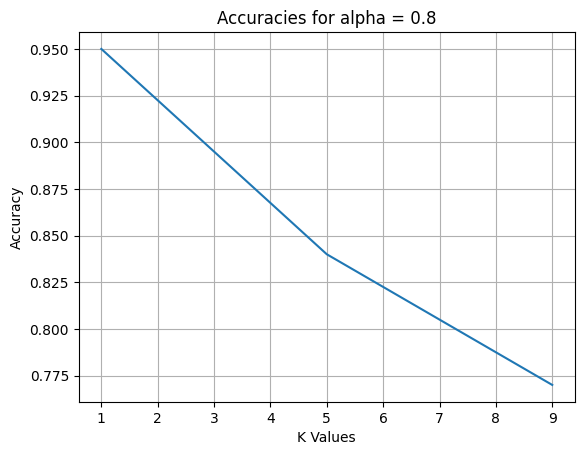

plot for alpha =  0.85 

Accuracy vector:  [0.95, 0.89, 0.845, 0.785, 0.745] 




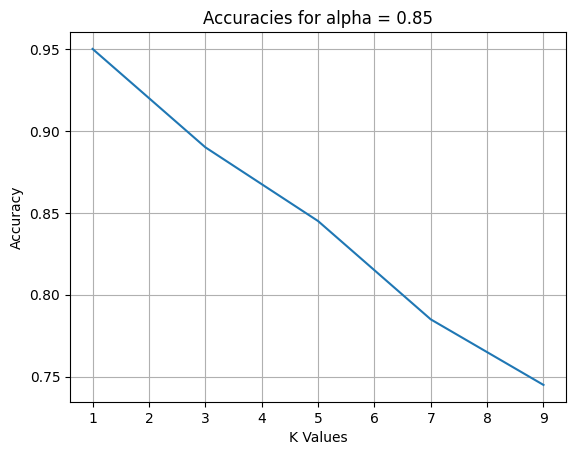

plot for alpha =  0.9 

Accuracy vector:  [0.935, 0.89, 0.85, 0.76, 0.765] 




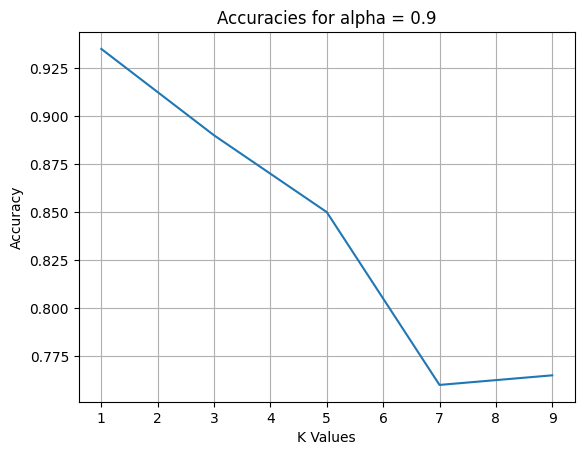

plot for alpha =  0.95 

Accuracy vector:  [0.94, 0.895, 0.84, 0.74, 0.715] 




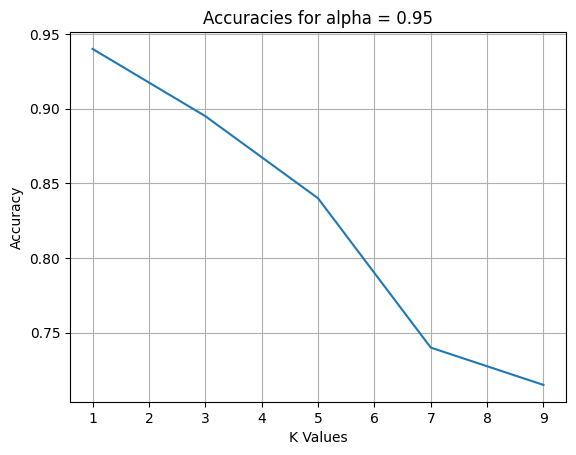

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import cv2
for alpha in alpha_values:
  accuracies = []
  # Perform PCA
  eigenvectors = pcA(train_data, alpha)
  training = project(train_data,eigenvectors)
  testing = project(test_data,eigenvectors)
  for k in k_values:
      #show_dimensions(eigenvectors,training,testing,alpha)
      accuracies.append(knn(k,training,train_labels,testing,test_labels))
      # d. Report Accuracy for every value of alpha separately
  print('plot for alpha = ',alpha,'\n')
  print('Accuracy vector: ',accuracies,'\n\n')
  plt.plot(k_values,accuracies)
  plt.title(f'Accuracies for alpha = {alpha}')
  plt.xlabel('K Values')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.show()

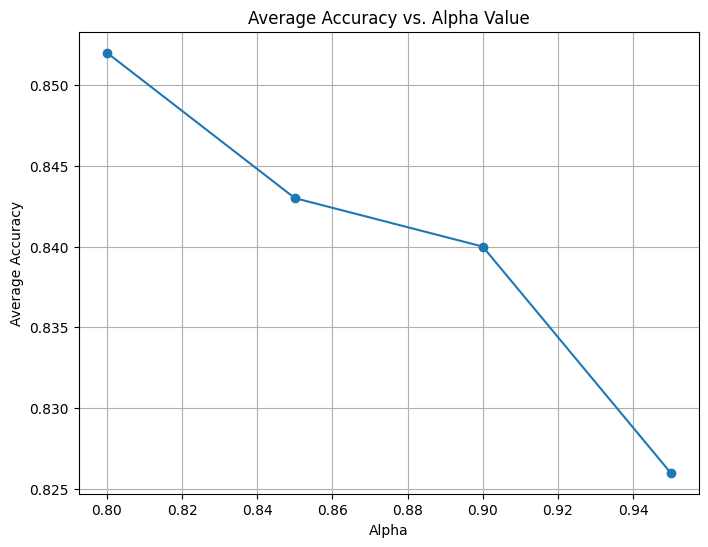

In [ ]:
import matplotlib.pyplot as plt

# Define the alpha values and accuracy vectors
alphas = [0.8, 0.85, 0.9, 0.95]
accuracy_vectors = [
    [0.95, 0.895, 0.84, 0.805, 0.77],
    [0.95, 0.89, 0.845, 0.785, 0.745],
    [0.935, 0.89, 0.85, 0.76, 0.765],
    [0.94, 0.895, 0.84, 0.74, 0.715]
]

# Calculate the average accuracy for each alpha
average_accuracies = [sum(acc) / len(acc) for acc in accuracy_vectors]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(alphas, average_accuracies, marker='o', linestyle='-')
plt.title('Average Accuracy vs. Alpha Value')
plt.xlabel('Alpha')
plt.ylabel('Average Accuracy')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# Standardize the bonus data
train_mean2 = np.mean(train_data2, axis=0)
train_std2 = (train_data2 - train_mean2) / np.std(train_data2, axis=0)
test_std2 = (test_data2 - train_mean2) / np.std(test_data2, axis=0)
centered_train2 = train_mean2 - train_data2

In [ ]:
def pcA2(data_matrix,alpha):
  cov_matrix = np.cov(centered_train2.T)
  eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
  # Sort eigenvectors and eigenvalues in descending order
  sorted_indices = np.argsort(eigenvalues)[::-1]
  eigenvectors = eigenvectors[:, sorted_indices]
  eigenvalues = eigenvalues[sorted_indices]
  total_variance = np.sum(eigenvalues) #computing the variance
  variance_threshold = alpha * total_variance #getting the threshold depending on the alpha
  # Determine the number of components to retain
  num_components = 0
  cumulative_variance = 0
  for eigenvalue in eigenvalues: #determining how many components to retrain
    cumulative_variance += eigenvalue
    num_components += 1
    if cumulative_variance >= variance_threshold:
        break
    # Keep the top eigenvalues and eigenvectors
    top_eigenvalues = eigenvalues[:num_components]
    top_eigenvectors = eigenvectors[:, :num_components]

  return top_eigenvectors


@ ɑlpha = 0.8

Reduction dimensions: 39
Train reduced dimensions: (39, 280)
Test reduced dimensions: (39, 120)
plot for alpha =  0.8 

Accuracy vector:  [0.9666666666666667, 0.9333333333333333, 0.8416666666666667, 0.8, 0.775] 




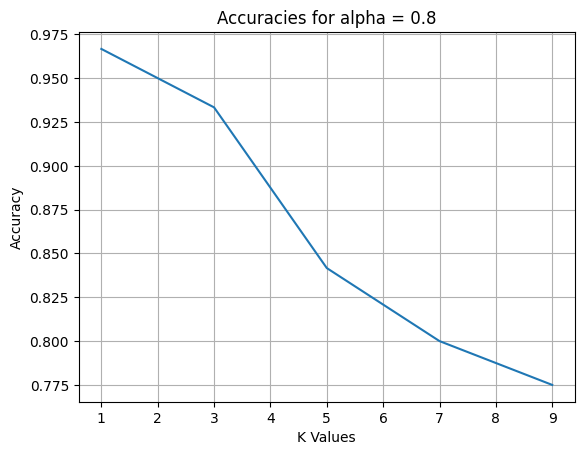


@ ɑlpha = 0.85

Reduction dimensions: 59
Train reduced dimensions: (59, 280)
Test reduced dimensions: (59, 120)
plot for alpha =  0.85 

Accuracy vector:  [0.9583333333333334, 0.9333333333333333, 0.85, 0.8, 0.7666666666666667] 




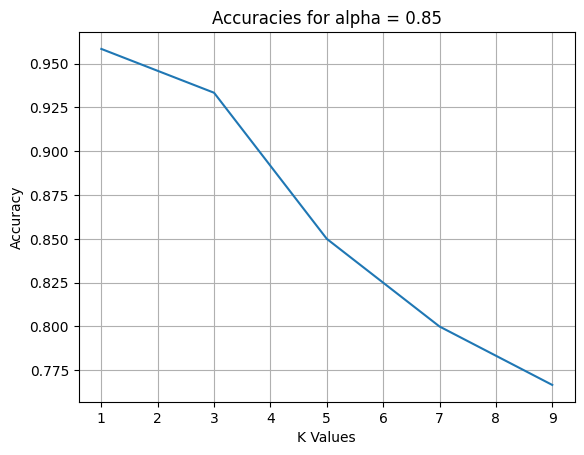


@ ɑlpha = 0.9

Reduction dimensions: 91
Train reduced dimensions: (91, 280)
Test reduced dimensions: (91, 120)
plot for alpha =  0.9 

Accuracy vector:  [0.9583333333333334, 0.9333333333333333, 0.85, 0.8, 0.7666666666666667] 




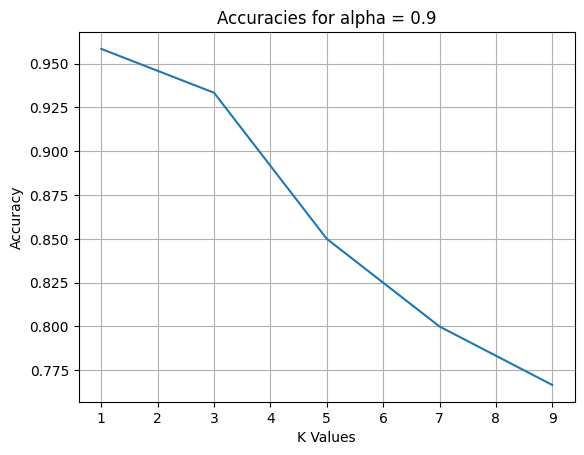


@ ɑlpha = 0.95

Reduction dimensions: 147
Train reduced dimensions: (147, 280)
Test reduced dimensions: (147, 120)
plot for alpha =  0.95 

Accuracy vector:  [0.95, 0.9, 0.8416666666666667, 0.8, 0.7416666666666667] 




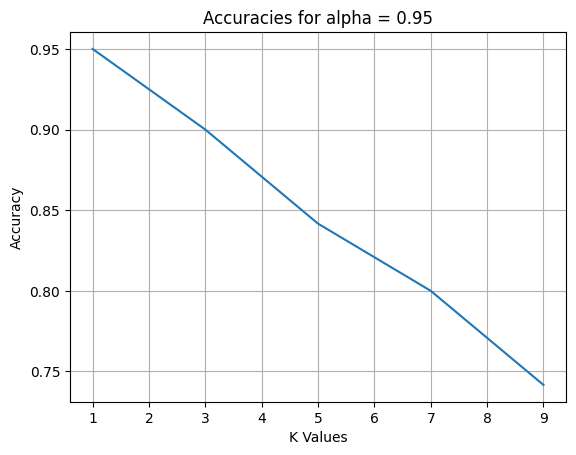

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import cv2
for alpha in alpha_values:
  accuracies = []
  # Perform PCA
  eigenvectors = pcA2(train_data2, alpha)
  training = project(train_data2,eigenvectors)
  testing = project(test_data2,eigenvectors)
  show_dimensions(eigenvectors,training,testing,alpha)
  for k in k_values:
      accuracies.append(knn(k,training,train_labels2,testing,test_labels2))
 # d. Report Accuracy for every value of alpha separately
  print('plot for alpha = ',alpha,'\n')
  print('Accuracy vector: ',accuracies,'\n\n')
  plt.plot(k_values,accuracies)
  plt.title(f'Accuracies for alpha = {alpha}')
  plt.xlabel('K Values')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.show()

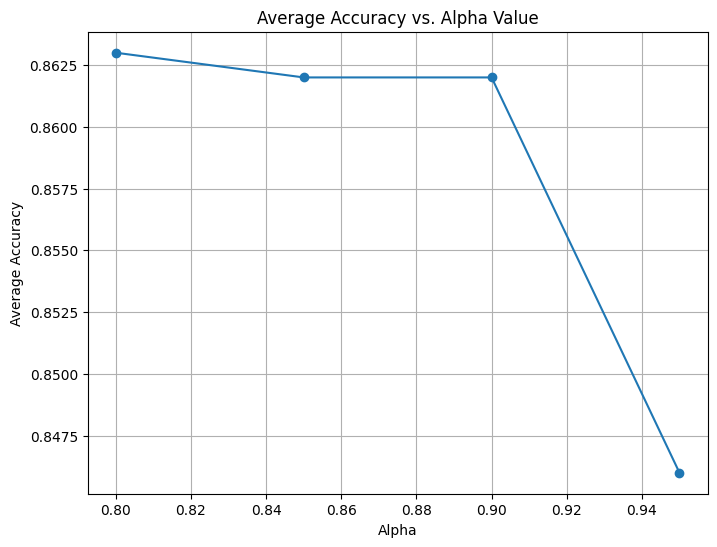

In [ ]:
import matplotlib.pyplot as plt

# Define the new alpha values and accuracy vectors
alphas = [0.8, 0.85, 0.9, 0.95]
accuracy_vectors = [
    [0.97, 0.93, 0.84, 0.8, 0.775],
    [0.96, 0.93, 0.85, 0.8, 0.77],
    [0.96, 0.93, 0.85, 0.8, 0.77],
    [0.95, 0.9, 0.84, 0.8, 0.74]
]

# Calculate the average accuracy for each alpha
average_accuracies = [sum(acc) / len(acc) for acc in accuracy_vectors]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(alphas, average_accuracies, marker='o', linestyle='-')
plt.title('Average Accuracy vs. Alpha Value')
plt.xlabel('Alpha')
plt.ylabel('Average Accuracy')
plt.grid(True)

# Show the plot
plt.show()
